# Question1 
# Who wrote the diputed essays, Hamilton or Madison?

In [1]:
# Import the packages
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import sys

In [2]:
df=pd.read_csv('HW4-data-fedPapers85.csv', sep=",")
df.head()
df1 = df.loc[11:,:]
df2 = df.loc[:10,:]
df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [3]:
X = df.drop(columns=['author','filename']).to_numpy()
y = df['author'].to_numpy()
df['author'].value_counts()

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

In [4]:
y, y_uniques = pd.factorize(y)
print(y, y_uniques)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4] ['dispt' 'Hamilton' 'HM' 'Jay' 'Madison']


In [5]:
pd.DataFrame({"author_name":y,"author_number":df['author']})

,author_name,author_number
0,0,dispt
1,0,dispt
2,0,dispt
3,0,dispt
4,0,dispt
...,...,...
80,4,Madison
81,4,Madison
82,4,Madison
83,4,Madison


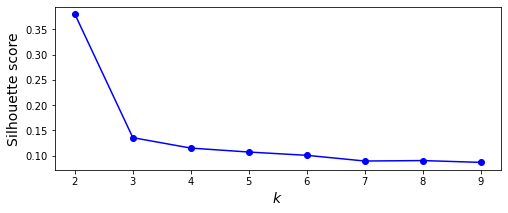

In [6]:
## Now we need to choose k for KMeans
from sklearn.metrics import silhouette_score

kmeans= [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

# Higer Silhourtte = better goodness 
# so we should choose k =2 
# Majority paper is written by H or M
# J and HM are just minority

In [8]:
## Obviously we should let k = 2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42) 
y2 = kmeans.fit_predict(X) 
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [9]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [10]:
df["k_means_labels"] = kmeans.labels_
df.head(11)

,author,filename,a,all,also,an,and,any,are,as,...,were,what,when,which,who,will,with,would,your,k_means_labels
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,0
5,dispt,dispt_fed_54.txt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,...,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.0,0
6,dispt,dispt_fed_55.txt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,...,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.0,0
7,dispt,dispt_fed_56.txt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,...,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.0,0
8,dispt,dispt_fed_57.txt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,...,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.0,0
9,dispt,dispt_fed_62.txt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,...,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.0,0


In [11]:
cluster_0 = df.loc[df['k_means_labels'] == 0]
cluster_0['author'].value_counts()
# So class Zero should belong to Madison
# Cuz Hamilton has 51 here 

Hamilton    51
Madison     15
dispt       11
HM           2
Name: author, dtype: int64

In [15]:
pd.DataFrame(cluster_0['author'].value_counts())

,author
Hamilton,51
Madison,15
dispt,11
HM,2


In [13]:
df['author'].value_counts()

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

In [6]:
# According to the Context, there should be around 4 custers. 
# so we let k = 4 this time
k = 4
kmeans_4 = KMeans(n_clusters=k, random_state=42) 
y_4 = kmeans_4.fit_predict(X) 
y_4 

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 3, 0, 1, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=int32)

In [7]:
k = 5
kmeans_5 = KMeans(n_clusters=k, random_state=42) 
y_5 = kmeans_5.fit_predict(X) 
y_5 

array([1, 4, 1, 4, 4, 1, 3, 4, 1, 3, 4, 3, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 3, 0, 1, 0, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 3,
       4, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 4, 4, 4, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1],
      dtype=int32)

In [8]:
k = 6
kmeans_6 = KMeans(n_clusters=k, random_state=42) 
y_6 = kmeans_6.fit_predict(X) 
y_6 

array([2, 4, 2, 2, 4, 2, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 0,
       0, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 3, 3, 4, 3, 3, 3, 1, 3, 3, 1, 0,
       4, 3, 0, 0, 1, 1, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 4, 4, 4, 5,
       5, 5, 5, 5, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2],
      dtype=int32)

In [9]:
# fit_predict(X) & kmeans.labels_ 
kmeans_4.labels_

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 3, 0, 1, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=int32)

In [10]:
df["k_means_labels"] = kmeans_4.labels_

In [12]:
df.head(11)

,author,filename,a,all,also,an,and,any,are,as,...,were,what,when,which,who,will,with,would,your,k_means_labels
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,1
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,1
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,1
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,1
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,1
5,dispt,dispt_fed_54.txt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,...,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.0,1
6,dispt,dispt_fed_55.txt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,...,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.0,3
7,dispt,dispt_fed_56.txt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,...,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.0,1
8,dispt,dispt_fed_57.txt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,...,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.0,1
9,dispt,dispt_fed_62.txt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,...,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.0,3


In [17]:
cluster_1 = df.loc[df['k_means_labels'] == 1]
cluster_1['author'].value_counts()
# So class one should belong to Madison
# HM = 3 here
# One person is dominated
# And it is more closer to Madison. 

Madison     11
dispt        9
Hamilton     4
HM           3
Name: author, dtype: int64

In [18]:
cluster_3 = df.loc[df['k_means_labels'] == 3]
cluster_3['author'].value_counts()
# So this class should belong to Hamilton
# It tells you the likelyhood. 

Hamilton    28
dispt        2
Madison      1
Name: author, dtype: int64

In [9]:
# When k = 4
X_new = df2.drop(columns=['author','filename']).to_numpy()
kmeans_4.predict(X_new)

# transform 
# 11*4
# kmeans.transform(X_new)

pd.DataFrame(kmeans_4.predict(X_new)).value_counts()

1    9
3    2
dtype: int64

In [10]:
# When k = 5
pd.DataFrame(kmeans_5.predict(X_new)).value_counts()

4    5
1    4
3    2
dtype: int64

In [11]:
# When k = 6
pd.DataFrame(kmeans_6.predict(X_new)).value_counts()

2    5
0    3
4    3
dtype: int64

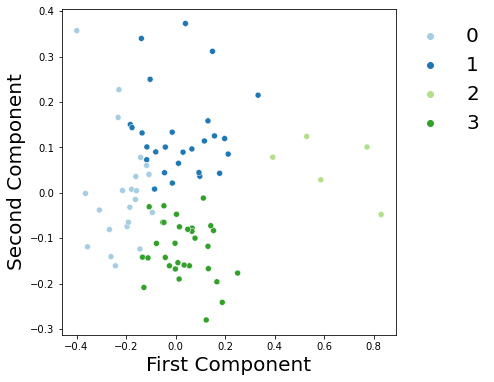

In [12]:
# When k = 4
# PCA for the original data
# for 2D visualization
from sklearn import decomposition
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_4, palette='Paired', ax=ax)

ax.set_xlabel("First Component", fontsize=20)
ax.set_ylabel("Second Component", fontsize=20)

ax.legend(frameon=False, 
          loc= 1, 
          bbox_to_anchor=(1.3, 1), 
          fontsize=20)

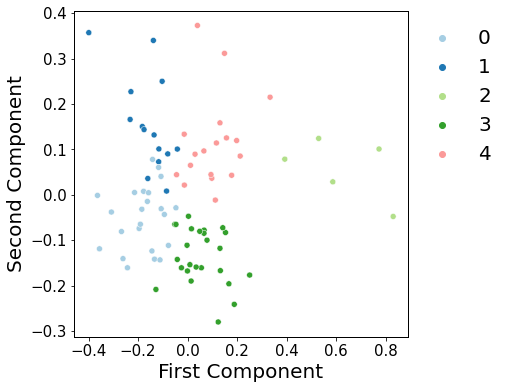

In [13]:
# when k = 5
# PCA for the original data
# for 2D visualization
from sklearn import decomposition
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)


import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_5, palette='Paired', ax=ax)

ax.set_xlabel("First Component", fontsize=20)
ax.set_ylabel("Second Component", fontsize=20)

ax.legend(frameon=False, 
          loc= 1, 
          bbox_to_anchor=(1.3, 1), 
          fontsize=20)

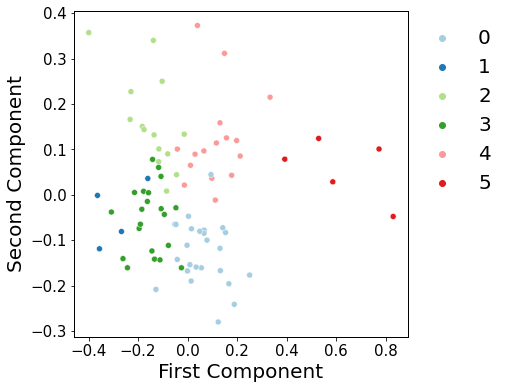

In [14]:
# when k = 5
# PCA for the original data
# for 2D visualization
from sklearn import decomposition
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)


import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_6, palette='Paired', ax=ax)

ax.set_xlabel("First Component", fontsize=20)
ax.set_ylabel("Second Component", fontsize=20)

ax.legend(frameon=False, 
          loc= 1, 
          bbox_to_anchor=(1.3, 1), 
          fontsize=20)

In [15]:
print(kmeans_4.inertia_,kmeans_5.inertia_, kmeans_6.inertia_)

8.139264465189527 7.549089995914422 7.225674764761906


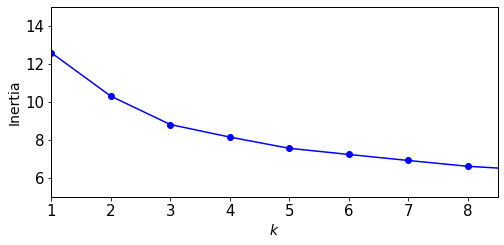

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#             xy=(7, inertias[6]),
#             xytext=(0.55, 0.55),
#             textcoords='figure fraction',
#             fontsize=16,
#             arrowprops=dict(facecolor='black', shrink=0.1)
#            )
plt.axis([1, 8.5, 5, 15])

plt.show()

# Considering Context, we choose k= 4

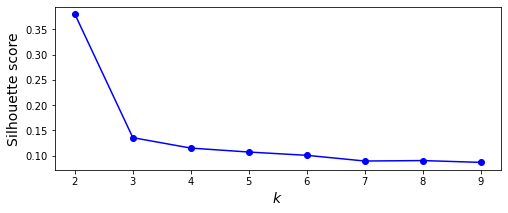

In [20]:
from sklearn.metrics import silhouette_score

kmeans= [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

# Higer Silhourtte = better goodness 
# so we should choose k =2 
# Majority paper is written by H or M
# J and HM are just minority

In [24]:
### HAC
import sklearn as skl

In [27]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

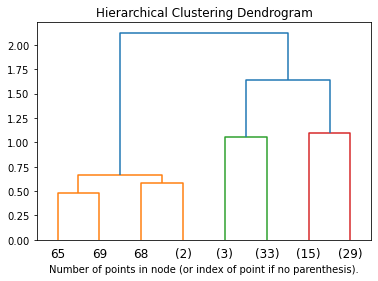

In [28]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p = 2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [32]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2)

model = model.fit(X)



In [33]:
model

AgglomerativeClustering()

In [34]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2)

model = model.fit(X)

model.fit_predict(X)    #### SIMILAR TO THE FORMER STEPS BEFORE (k-means)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
kmeans_4.predict(X_new)

array([1, 4, 1, 4, 4, 1, 3, 4, 1, 3, 4], dtype=int32)

In [44]:
pd.DataFrame(kmeans_4.predict(X_new)).value_counts()

4    5
1    4
3    2
dtype: int64

In [45]:
pd.DataFrame(kmeans_4.predict(X)).value_counts()

3    25
0    23
4    18
1    14
2     5
dtype: int64

In [48]:
pd.DataFrame(kmeans_4.predict(df1.drop(columns=['author','filename']).to_numpy())).value_counts()

0    23
3    23
4    13
1    10
2     5
dtype: int64

In [53]:
df.loc[64:70,]

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
64,HM,HM_fed_20.txt,0.225,0.054,0.018,0.045,0.494,0.000,0.117,0.090,...,0.063,0.000,0.000,0.027,0.117,0.027,0.036,0.072,0.009,0.000
65,Jay,Jay_fed_2.txt,0.236,0.026,0.017,0.009,0.733,0.009,0.052,0.131,...,0.070,0.061,0.017,0.026,0.096,0.070,0.017,0.096,0.044,0.000
66,Jay,Jay_fed_3.txt,0.130,0.040,0.030,0.030,0.601,0.050,0.080,0.221,...,0.000,0.010,0.000,0.010,0.110,0.030,0.241,0.100,0.010,0.000
67,Jay,Jay_fed_4.txt,0.135,0.036,0.018,0.027,0.821,0.045,0.099,0.172,...,0.009,0.009,0.054,0.036,0.090,0.009,0.135,0.090,0.144,0.000
68,Jay,Jay_fed_5.txt,0.096,0.032,0.021,0.021,0.764,0.032,0.032,0.032,...,0.032,0.064,0.021,0.000,0.106,0.032,0.074,0.117,0.382,0.032
69,Jay,Jay_fed_64.txt,0.202,0.046,0.013,0.039,0.657,0.052,0.163,0.228,...,0.013,0.000,0.000,0.033,0.091,0.117,0.163,0.072,0.046,0.000
70,Madison,Madison_fed_10.txt,0.359,0.020,0.000,0.069,0.590,0.020,0.133,0.093,...,0.010,0.000,0.025,0.005,0.192,0.044,0.147,0.049,0.029,0.000


In [56]:
df["author"].value_counts()

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

# Question 2

In [42]:
import pandas as pd
bank = pd.read_csv("bankdata_csv_all.csv")
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [43]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [44]:
bank["pep"].value_counts()

NO     326
YES    274
Name: pep, dtype: int64

In [45]:
bank["sex"], sex_uniques = pd.factorize(bank["sex"])
bank["married"], married_uniques = pd.factorize(bank["married"])
bank["car"], car_uniques = pd.factorize(bank["car"])
bank["save_act"], save_act_uniques = pd.factorize(bank["save_act"])
bank["current_act"], current_act_uniques = pd.factorize(bank["current_act"])
bank["mortgage"], mortgage_uniques = pd.factorize(bank["mortgage"])
bank["pep"], pep_uniques = pd.factorize(bank["pep"])

In [48]:
bank1 = pd.get_dummies(bank, columns=['region'],
                 prefix_sep ='_', 
                 dummy_na = False, 
                 drop_first = False)

In [51]:
bank2 = pd.get_dummies(bank1, columns=['children'],
                 prefix_sep ='_', 
                 dummy_na = False, 
                 drop_first = False)

In [52]:
X = bank2.drop(columns=['pep','id']).to_numpy()
y = bank2['id'].to_numpy()

In [58]:
X[:2]

array([[4.80000e+01, 0.00000e+00, 1.75460e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00],
       [4.00000e+01, 1.00000e+00, 3.00851e+04, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00]])

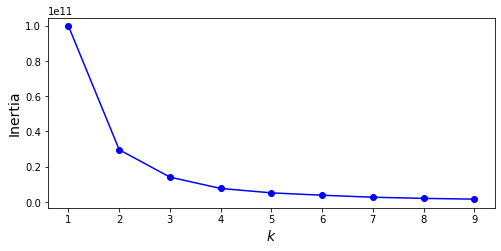

In [61]:
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import sys

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# # Elbow
# plt.axis([1, 8.5, 0, 1300])

plt.show()

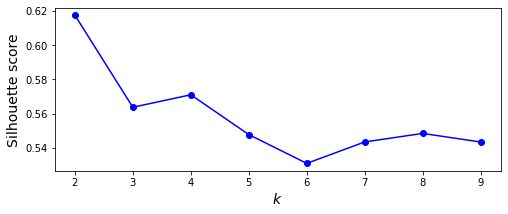

In [74]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [ ]:
# Combine 2 methods and we can know k = 4 might be the best choice. 

In [80]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [81]:
y_pred[:20]

array([1, 4, 3, 1, 5, 0, 3, 4, 4, 4, 5, 4, 3, 5, 1, 1, 1, 2, 4, 1],
      dtype=int32)

In [102]:
pd.DataFrame(y_pred).value_counts()

3    142
1    139
4    130
0     83
2     61
5     45
dtype: int64

In [83]:
bank["pep"].value_counts()

1    326
0    274
Name: pep, dtype: int64

In [94]:
bank = pd.read_csv("bankdata_csv_all.csv")

In [96]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [121]:
result = bank[['pep']]
result = result.join(pd.DataFrame(y_pred))
result.head()

,pep,0
0,YES,1
1,NO,4
2,NO,3
3,NO,1
4,NO,5


In [128]:
pd.DataFrame(result.groupby(["pep",0]).size())

0
pep 0    
NO  0  36
    1  75
    2  35
    3  99
    4  73
    5   8
YES 0  47
    1  64
    2  26
    3  43
    4  57
    5  37

In [129]:
# HAC for Question 2
bk = pd.read_csv("bankdata_csv_all.csv")
bk.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [130]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [136]:
bk["sex"], sex_uniques = pd.factorize(bank["sex"])
bk["married"], married_uniques = pd.factorize(bank["married"])
bk["car"], car_uniques = pd.factorize(bank["car"])
bk["save_act"], save_act_uniques = pd.factorize(bank["save_act"])
bk["current_act"], current_act_uniques = pd.factorize(bank["current_act"])
bk["mortgage"], mortgage_uniques = pd.factorize(bank["mortgage"])
bk["pep"], pep_uniques = pd.factorize(bank["pep"])
bk["region"], region_unique = pd.factorize(bk["region"])
bk["children"], children_unique = pd.factorize(bk["children"])

In [137]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 56.4+ KB


In [138]:
X = bk.drop(columns=['pep','id']).to_numpy()

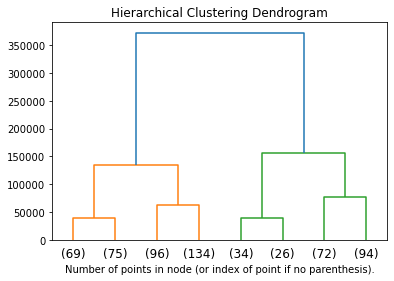

In [139]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p = 2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [140]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=5)

model = model.fit(X)

model.fit_predict(X)

array([0, 4, 3, 0, 2, 1, 3, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 1, 0, 0, 2, 3,
       1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 2, 0,
       3, 2, 3, 3, 1, 0, 3, 0, 3, 4, 2, 2, 0, 0, 3, 0, 0, 1, 0, 3, 3, 0,
       3, 4, 0, 3, 3, 3, 4, 0, 2, 4, 0, 2, 3, 4, 0, 0, 3, 3, 0, 4, 3, 0,
       3, 4, 0, 0, 4, 1, 1, 3, 3, 4, 3, 3, 0, 3, 3, 4, 4, 4, 1, 3, 3, 0,
       1, 0, 1, 4, 1, 2, 0, 3, 0, 1, 4, 2, 0, 4, 1, 1, 0, 1, 3, 0, 0, 1,
       3, 1, 2, 4, 3, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 4, 2, 0, 0, 0, 1, 2,
       1, 4, 3, 1, 0, 2, 1, 0, 4, 4, 0, 4, 4, 0, 2, 3, 2, 3, 1, 0, 0, 2,
       3, 0, 0, 1, 3, 0, 3, 3, 2, 3, 1, 0, 0, 4, 3, 3, 3, 0, 3, 4, 4, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 0, 3, 4, 0, 3, 4, 1, 3, 2, 0, 0, 3, 3, 2,
       4, 0, 0, 1, 3, 0, 0, 0, 2, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1,
       0, 0, 4, 4, 4, 3, 2, 2, 3, 0, 0, 3, 0, 0, 0, 1, 0, 3, 2, 1, 3, 3,
       0, 0, 3, 1, 3, 1, 1, 0, 0, 4, 0, 3, 0, 3, 3,